In [1]:
import pandas as pd
MyData = pd.read_csv("D:/ML/Practical/ML Dataset/Bengaluru_House_Data.csv")

In [2]:
MyData.shape

(13320, 9)

In [3]:
print(MyData.head)
print(MyData.dtypes)

<bound method NDFrame.head of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0 

In [4]:
MyData.isnull().sum() 

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
MyData.describe() 

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
#Checking different percentiles
pd.DataFrame(MyData['price']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,price
count,13320.000000
mean,112.565627
std,148.971674
min,8.000000
1%,18.500000
10%,38.000000
30%,54.000000
50%,72.000000
75%,120.000000
90%,220.000000


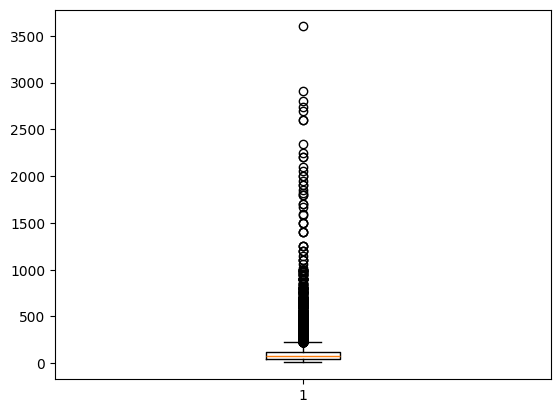

In [9]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(MyData['price'])
plt.show()

In [12]:
#Checking Outlier by definition and treating outliers

#getting median Age
Age_col_df = pd.DataFrame(MyData['price'])
Age_median = Age_col_df.median()

#getting IQR of Age column
Q3 = Age_col_df.quantile(q=0.75)
Q1 = Age_col_df.quantile(q=0.25)
IQR = Q3-Q1

#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

#Finding and treating outliers - both lower and upper end
MyData.loc[MyData['price']>IQR_UL , 'price'] = int(Age_col_df.quantile(q=0.90))
MyData.loc[MyData['price']<IQR_LL , 'price'] = int(Age_col_df.quantile(q=0.01))

C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_12084\737662435.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_LL = int(Q1 - 1.5*IQR)
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_12084\737662435.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_UL = int(Q3 + 1.5*IQR)
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_12084\737662435.py:17: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  MyData.loc[MyData['price']>IQR_UL , 'price'] = int(Age_col_df.quantile(q=0.90))
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_12084\737662435.py:18: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  MyData.loc[MyData['price']<IQR

In [14]:
#Separating features and response
'''features = ["Income","Age"]
response = ["Expense"]
x=MyData[features]
y=MyData[response]'''

#print(x)

#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(MyData)
scaled_data

#converting data back to pandas dataframe
MyData_scaled = pd.DataFrame(scaled_data)
MyData_scaled.columns = MyData.columns

#Separating features and response
features = ["total_sqft","bath","balcony"]
response = ["price"]
x=MyData_scaled[features]
y=MyData_scaled[response]

ValueError: could not convert string to float: 'Super built-up  Area'